<a href="https://colab.research.google.com/github/areeba-droid/ComputerVisionFonts/blob/main/MetricsFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> <b> Font Classification Using YOLO <b> </h1></center>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required Libraries

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

# Dataset Description






In [9]:
#run to get dataset
data_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images' #replace with directory to dataset

Database that we used: https://www.kaggle.com/datasets/frobert/font-from-image

Link to the whole dataset: https://drive.google.com/drive/folders/1TyGVXAdfea6IgW4oSA8b4-z9FCrFbS05?usp=drive_link

or the ZIP: https://1sfu-my.sharepoint.com/:u:/g/personal/pyc5_sfu_ca/EeV7XZhGuDpAr_uK3HSmRlUBZZYcvd7vT5hMWvmDfw_2Mg?e=0W2i9M

Images we added: SwankyandMooMoo folder & Gopher folder

## Heirarchy of folders correction and preprocessing

In [10]:
test_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val'
train_dir = '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train'

Defining paths to train and test folders.

In [11]:
#set the paths to labels and images directory
label_dir= "/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels"
image_dir="/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images"

In [ ]:
#get list of all class names and put into an array
classList = os.listdir(test_dir)

classList

['Aladin-Regular',
 'BowlbyOneSC-Regular',
 'Bonbon-Regular',
 'AmaticSC-Regular',
 'AmericanTypewriter-Condensed',
 'CarterOne',
 'BrushScriptMT',
 'BradleyHandITCTT-Bold',
 'AlexBrush-Regular',
 'Allura-Regular',
 'Didot',
 'Chalkduster',
 'CourierNewPSMT',
 'Damion',
 'DancingScript-Bold',
 'GochiHand-Regular',
 'Copperplate',
 'Cookie-Regular',
 'FredokaOne-Regular',
 'Futura-CondensedMedium',
 'HelveticaNeue',
 'GreatVibes-Regular',
 'Noteworthy-Light',
 'Optima-Regular',
 'GrandHotel-Regular',
 'Luminari-Regular',
 'Impact',
 'Helvetica-Bold',
 'Pacifico-Regular',
 'MarkerFelt-Thin',
 'Shojumaru-Regular',
 'RockSalt',
 'Rockwell-Regular',
 'Yesteryear-Regular',
 'TimesNewRomanPSMT',
 'SwankyandMooMoo',
 'Gopher']

Making directories according to above struture of folders

In [ ]:
#import os
#run it once for making directories

#os.makedirs('/content/drive/MyDrive/Tutorials/Datasets/FRUIT DATA/Final_data')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images')
os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train')
# os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val')

In [ ]:
#create folders inside train/test/val to label data
for item in classList:
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/' + item)
  os.makedirs('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/val/' + item)
  # print('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/labels/train/' + item)

In [ ]:
import os, glob

def load_data():
    X,y=[],[]
    count = 0
    for file in glob.glob("/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/*/*"):
        file_name=os.path.basename(file)
        font_name=os.path.basename(os.path.dirname(file))
        font_image = (file)
        X.append(font_image)
        y.append(font_name)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{11682} samples',end=' ')
        # print(font_image)
    # Return arrays to plug into sklearn's cross-validation algorithms
    return np.array(X), np.array(y)

In [ ]:
font_image, font_name = load_data()

 Processed 11682/11682 samples 

In [ ]:
font_image

In [ ]:
font_name

In [ ]:
from sklearn.model_selection import train_test_split

#splitting our data
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    font_image,
    font_name,
    test_size=0.2,
    random_state=42
)

In [ ]:
X_train80

array(['/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/GreatVibes-Regular/GreatVibes-Regular$$U0069U006eU0063.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/DancingScript-Bold/DancingScript-Bold$$U0051.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/HelveticaNeue/HelveticaNeue$$U0054U0069U006d.00000.png',
       ...,
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Copperplate/Copperplate$$U0074U0068U006f.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/AmaticSC-Regular/AmaticSC-Regular$$U0044U0045U0042.00000.png',
       '/content/drive/MyDrive/IAT 360/Computer Vision Project/font_data/Noteworthy-Light/Noteworthy-Light$$U0048U0052U0045.00000.png'],
      dtype='<U149')

In [ ]:
y_train80

array(['GreatVibes-Regular', 'DancingScript-Bold', 'HelveticaNeue', ...,
       'Copperplate', 'AmaticSC-Regular', 'Noteworthy-Light'],
      dtype='<U28')

In [14]:
X_test = []
y_test = []

for file in glob.glob('/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/*/*'):
  font_name=os.path.basename(os.path.dirname(file))

  y_test.append(font_name)
  X_test.append(file)



In [16]:
X_test

['/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U003f.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U0044.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U0046U0049U0043.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U00c3U00a8.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U0042U0041U0044.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U0048U0041U0056.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U00c3U00b5.00000.png',
 '/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Aladin-Regular/Aladin-Regular$$U0031.00000.png',
 '/conte

In [15]:
y_test

['Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regul

Copy png files from the train folder to the folders created.

In [ ]:
#import shutil
#run it once for copying!
for file in X_train80:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"train", className, new_filename), "PNG")


#Copy png files from the test folder to the folders created.
for file in X_test:
    #going through the training data and forming the directory
    if file.endswith(".png"):
        #'file' is the whole directory
        image = Image.open(file)
        image = image.convert("RGB")
        #just gets the name of the png file
        new_filename = os.path.basename(file)
        #gets the class name of the file
        className = new_filename.split("$$")[0]
        image.save(os.path.join(image_dir,"val", className, new_filename), "PNG")
        # print(os.path.join(image_dir,"val", className, new_filename))


Visualizing somme pictures from the dataset

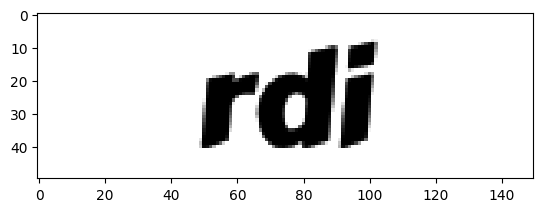

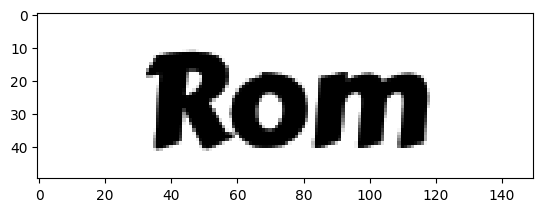

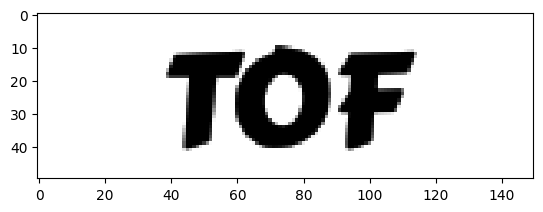

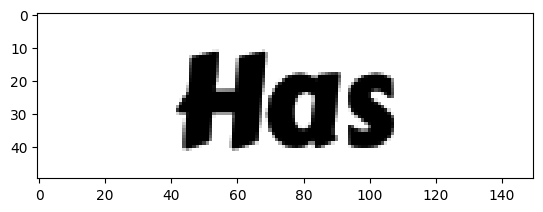

In [ ]:
#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train", "CarterOne"))):
    img = cv2.imread(os.path.join(image_dir,"train", "CarterOne", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [ ]:
#creating dataframe

training_data = []

#loop through all the font folders
for font in os.listdir(train_dir):
  folder = os.path.join(train_dir, font)
  for image in os.listdir(folder):
    training_data.append({'filename':image, 'label':font})

  # print(font + "completed")

#create the dataframe from the data
df = pd.DataFrame(training_data)

df

filename           label
0     Aladin-Regular$$U0048U004fU0055.00000.png  Aladin-Regular
1     Aladin-Regular$$U0041U006cU0065.00000.png  Aladin-Regular
2               Aladin-Regular$$U0025.00000.png  Aladin-Regular
3               Aladin-Regular$$U0036.00000.png  Aladin-Regular
4     Aladin-Regular$$U0045U0054U0045.00000.png  Aladin-Regular
...                                         ...             ...
9389                             Gopher$$35.png          Gopher
9390                              Gopher$$3.png          Gopher
9391                              Gopher$$8.png          Gopher
9392                             Gopher$$31.png          Gopher
9393                             Gopher$$50.png          Gopher

[9394 rows x 2 columns]

In [ ]:
#creating dataframe

val_data = []

#loop through all the font folders
for font in os.listdir(test_dir):
  folder = os.path.join(test_dir, font)
  for image in os.listdir(folder):
    val_data.append({'filename':image, 'label':font})

  # print(font + " completed")

#create the dataframe from the data
df2 = pd.DataFrame(val_data)

df2

filename           label
0               Aladin-Regular$$U003f.00000.png  Aladin-Regular
1               Aladin-Regular$$U0044.00000.png  Aladin-Regular
2     Aladin-Regular$$U0046U0049U0043.00000.png  Aladin-Regular
3          Aladin-Regular$$U00c3U00a8.00000.png  Aladin-Regular
4     Aladin-Regular$$U0042U0041U0044.00000.png  Aladin-Regular
...                                         ...             ...
2345                              Gopher$$1.png          Gopher
2346                              Gopher$$6.png          Gopher
2347                             Gopher$$24.png          Gopher
2348                             Gopher$$42.png          Gopher
2349                             Gopher$$14.png          Gopher

[2350 rows x 2 columns]

In [ ]:
#checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9394 entries, 0 to 9393
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  9394 non-null   object
 1   label     9394 non-null   object
dtypes: object(2)
memory usage: 146.9+ KB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2350 non-null   object
 1   label     2350 non-null   object
dtypes: object(2)
memory usage: 36.8+ KB


In [ ]:
print(df['label'].unique())
print(df2['label'].unique())

['Aladin-Regular' 'BowlbyOneSC-Regular' 'Bonbon-Regular'
 'AmaticSC-Regular' 'AmericanTypewriter-Condensed' 'CarterOne'
 'BrushScriptMT' 'BradleyHandITCTT-Bold' 'AlexBrush-Regular'
 'Allura-Regular' 'Didot' 'Chalkduster' 'CourierNewPSMT' 'Damion'
 'DancingScript-Bold' 'GochiHand-Regular' 'Copperplate' 'Cookie-Regular'
 'FredokaOne-Regular' 'Futura-CondensedMedium' 'HelveticaNeue'
 'GreatVibes-Regular' 'Noteworthy-Light' 'Optima-Regular'
 'GrandHotel-Regular' 'Luminari-Regular' 'Impact' 'Helvetica-Bold'
 'Pacifico-Regular' 'MarkerFelt-Thin' 'Shojumaru-Regular' 'RockSalt'
 'Rockwell-Regular' 'Yesteryear-Regular' 'TimesNewRomanPSMT'
 'SwankyandMooMoo' 'Gopher']
['Aladin-Regular' 'BowlbyOneSC-Regular' 'Bonbon-Regular'
 'AmaticSC-Regular' 'AmericanTypewriter-Condensed' 'CarterOne'
 'BrushScriptMT' 'BradleyHandITCTT-Bold' 'AlexBrush-Regular'
 'Allura-Regular' 'Didot' 'Chalkduster' 'CourierNewPSMT' 'Damion'
 'DancingScript-Bold' 'GochiHand-Regular' 'Copperplate' 'Cookie-Regular'
 'FredokaOne-

In [ ]:
label_map = {'Aladin-Regular' : 0,
 'AlexBrush-Regular' : 1,
   'Allura-Regular' : 2,
   'AmaticSC-Regular' : 3,
   'AmericanTypewriter-Condensed': 4,
   'Bonbon-Regular' : 5,
   'BowlbyOneSC-Regular' : 6,
   'BradleyHandITCTT-Bold' : 7,
   'BrushScriptMT' : 8,
   'CarterOne' : 9,
   'Chalkduster' : 10,
   'Cookie-Regular' : 11,
   'Copperplate' : 12,
   'CourierNewPSMT' : 13,
   'Damion' : 14,
   'DancingScript-Bold' : 15,
   'Didot' : 16,
   'FredokaOne-Regular' : 17,
   'Futura-CondensedMedium' : 18,
   'GochiHand-Regular' : 19,
   'GrandHotel-Regular' : 20,
   'GreatVibes-Regular' : 21,
   'Helvetica-Bold' : 22,
   'HelveticaNeue' : 23,
   'Impact' : 24,
   'Luminari-Regular' : 25,
   'MarkerFelt-Thin' : 26,
   'Noteworthy-Light' : 27,
   'Optima-Regular' : 28,
   'Pacifico-Regular' : 29,
   'RockSalt' : 30,
   'Rockwell-Regular' : 31,
   'Shojumaru-Regular' : 32,
   'SwankyandMooMoo' : 33,
   'TimesNewRomanPSMT' : 34,
   'Yesteryear-Regular' : 35,
   'Gopher' : 36}

df['class'] = df['label'].map(label_map)
df2['class'] = df2['label'].map(label_map)

In [ ]:
df2

filename           label  class
0               Aladin-Regular$$U003f.00000.png  Aladin-Regular      0
1               Aladin-Regular$$U0044.00000.png  Aladin-Regular      0
2     Aladin-Regular$$U0046U0049U0043.00000.png  Aladin-Regular      0
3          Aladin-Regular$$U00c3U00a8.00000.png  Aladin-Regular      0
4     Aladin-Regular$$U0042U0041U0044.00000.png  Aladin-Regular      0
...                                         ...             ...    ...
2345                              Gopher$$1.png          Gopher     36
2346                              Gopher$$6.png          Gopher     36
2347                             Gopher$$24.png          Gopher     36
2348                             Gopher$$42.png          Gopher     36
2349                             Gopher$$14.png          Gopher     36

[2350 rows x 3 columns]

In [ ]:
df

filename           label  class
0     Aladin-Regular$$U0048U004fU0055.00000.png  Aladin-Regular      0
1     Aladin-Regular$$U0041U006cU0065.00000.png  Aladin-Regular      0
2               Aladin-Regular$$U0025.00000.png  Aladin-Regular      0
3               Aladin-Regular$$U0036.00000.png  Aladin-Regular      0
4     Aladin-Regular$$U0045U0054U0045.00000.png  Aladin-Regular      0
...                                         ...             ...    ...
9389                             Gopher$$35.png          Gopher     36
9390                              Gopher$$3.png          Gopher     36
9391                              Gopher$$8.png          Gopher     36
9392                             Gopher$$31.png          Gopher     36
9393                             Gopher$$50.png          Gopher     36

[9394 rows x 3 columns]

In [ ]:
train_df = df.astype(str)
val_df = df2.astype(str)

Only run to create text files for lables

In [ ]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{folder}/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['filename'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.filename == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class'])

#writing on text files
  folder = name.split("$$")[0]
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{folder}/{name}.txt', 'w') as file:
            file.write(text)

KeyboardInterrupt: 

In [ ]:
#training
print("before deleting (train data): " , df.shape)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("after deleting(train_data): " ,df.shape)

#validation
print("before deleting (val data): " , df2.shape)
df2.replace([np.inf, -np.inf], np.nan, inplace=True)
df2.dropna(inplace=True)
print("after deleting(val data): " , df2.shape)

print("nothing to remove")

before deleting (train data):  (9394, 3)
after deleting(train_data):  (9394, 3)
before deleting (val data):  (2350, 3)
after deleting(val data):  (2350, 3)
nothing to remove


# Custom font identification using YOLO


First install and import

In [18]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.4/112.6 GB disk)


In [19]:
from ultralytics import YOLO

## Training YOLO

In [ ]:
# model = YOLO('yolov8n-cls.pt') #this model is less accurate

model = YOLO('yolov8s-cls.pt')
model2= YOLO('yolov8s-cls.pt')

100%|██████████| 12.3M/12.3M [00:00<00:00, 48.3MB/s]


The detailed architecture of the model can be seen from:


In [ ]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
%%writefile config.yaml
path: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val

# Classes
nc: 37 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: Aladin-Regular
  1: AlexBrush-Regular
  2: Allura-Regular
  3: AmaticSC-Regular
  4: AmericanTypewriter-Condensed
  5: Bonbon-Regular
  6: BowlbyOneSC-Regular
  7: BradleyHandITCTT-Bold
  8: BrushScriptMT
  9: CarterOne
  10: Chalkduster
  11: Cookie-Regular
  12: Copperplate
  13: CourierNewPSMT
  14: Damion
  15: DancingScript-Bold
  16: Didot
  17: FredokaOne-Regular
  18: Futura-CondensedMedium
  19: GochiHand-Regular
  20: GrandHotel-Regular
  21: GreatVibes-Regular
  22: Helvetica-Bold
  23: HelveticaNeue
  24: Impact
  25: Luminari-Regular
  26: MarkerFelt-Thin
  27: Noteworthy-Light
  28: Optima-Regular
  29: Pacifico-Regular
  30: RockSalt
  31: Rockwell-Regular
  32: Shojumaru-Regular
  33: SwankyandMooMoo
  34: TimesNewRomanPSMT
  35: Yesteryear-Regular
  36: Gopher

Writing config.yaml


Please look at [Yolo train Docs](https://docs.ultralytics.com/modes/train/#train-settings) for hyperparameters for model tuning and configuration, e.g. lr0, imgsz, model etc.

In [ ]:
#classification yolo model does not take yaml files as argument, it uses a directory
# model.train(data="/content/config.yaml", epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=640)

In [ ]:
# the first model:
model.train(data=data_dir, epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=640)
# the second model:
# model2.train(data=data_dir, epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=224)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images, epochs=3, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

100%|██████████| 5.35M/5.35M [00:00<00:00, 323MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... 9441 images, 0 corrupt: 100%|██████████| 9441/9441 [14:07<00:00, 11.14it/s]


train: New cache created: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train.cache


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [03:28<00:00, 11.32it/s]


val: New cache created: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


        1/3      1.49G      3.624          8        640:   2%|▏         | 23/1181 [00:02<01:08, 16.92it/s]

        1/3      1.49G       3.62          8        640:   4%|▍         | 45/1181 [00:03<01:00, 18.63it/s]
100%|██████████| 755k/755k [00:00<00:00, 106MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:12<00:00, 11.78it/s]

                   all      0.814      0.976



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:12<00:00, 11.94it/s]

                   all      0.933      0.988



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:12<00:00, 11.73it/s]

                   all      0.948      0.989



3 epochs completed in 0.070 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train/weights/best.pt, 10.3MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,122,597 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:12<00:00, 12.13it/s]


                   all      0.948      0.989
Speed: 0.4ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79164cc94220>
curves: []
curves_results: []
fitness: 0.968657374382019
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9483270049095154, 'metrics/accuracy_top5': 0.9889877438545227, 'fitness': 0.968657374382019}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.4408485755128711, 'inference': 0.5695462378340725, 'loss': 0.0022352372928475584, 'postprocess': 0.0008466333617905548}
task: 'classify'
top1: 0.9483270049095154
top5: 0.9889877438545227

In [ ]:
model2.train(data=data_dir, epochs=3,patience=5,batch=8, lr0=0.0005,imgsz=224)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.pt, data=/content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images, epochs=3, time=None, patience=5, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cro

train: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... 9441 images, 0 corrupt: 100%|██████████| 9441/9441 [00:00<?, ?it/s]
val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/classify/train3
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 21.19it/s]

                   all      0.831      0.977



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 21.92it/s]

                   all      0.943      0.989



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:07<00:00, 20.98it/s]

                   all      0.953      0.991



3 epochs completed in 0.038 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 10.3MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,122,597 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:06<00:00, 22.73it/s]


                   all      0.953      0.991
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7914284c4700>
curves: []
curves_results: []
fitness: 0.9716221690177917
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9525624513626099, 'metrics/accuracy_top5': 0.9906818866729736, 'fitness': 0.9716221690177917}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.06159419278278536, 'inference': 0.4189959626640116, 'loss': 0.0008173485723202232, 'postprocess': 0.0006754688164380989}
task: 'classify'
top1: 0.9525624513626099
top5: 0.9906818866729736

## Evaluation Metrics

In [20]:
model = YOLO('/content/drive/MyDrive/IAT 360/Computer Vision Project/best.pt')
model2 = YOLO('/content/drive/MyDrive/IAT 360/Computer Vision Project/best2.pt')

[This](https://docs.ultralytics.com/guides/yolo-performance-metrics/) is a very good detailed explanation of different perfromance metrics in YOLO.

**Choosing the Right Metrics**

Choosing the right metrics to evaluate often depends on the specific application.

- mAP: Suitable for a broad assessment of model performance.

- IoU: Essential when precise object location is crucial.

- Precision: Important when minimizing false detections is a priority.

- Recall: Vital when it's important to detect every instance of an object.

- F1 Score: Useful when a balance between precision and recall is needed.


In [21]:
y_pred = []

for img in X_test:
  results = model(img)[0]
  predicted_class = results.probs.top1 #get the lable with the highest weight/score
  predicted_class_name = results.names[predicted_class]

  y_pred.append(predicted_class_name)

Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U006fU0072U0074.00000.png: 640x640 Didot 1.00, GreatVibes-Regular 0.00, AlexBrush-Regular 0.00, Gopher 0.00, TimesNewRomanPSMT 0.00, 3.6ms
Speed: 16.9ms preprocess, 3.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U0053U0049U0052.00000.png: 640x640 Didot 1.00, GreatVibes-Regular 0.00, AlexBrush-Regular 0.00, TimesNewRomanPSMT 0.00, Gopher 0.00, 3.6ms
Speed: 17.2ms preprocess, 3.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U0048U0052U0045.00000.png: 640x640 Didot 1.00, TimesNewRomanPSMT 0.00, GreatVibes-Regular 0.00, Luminari-Regular 0.00, Gopher 0.00, 3.6ms
Speed: 17.0ms preprocess, 3.6ms inference, 0.1ms postprocess pe

In [22]:
y_pred

['Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'Aladin-Regular',
 'CarterOne',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Damion',
 'CarterOne',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'GrandHotel-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'Bowlby

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%')
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

#testing on the validation set

Test Set Accuracy score =  95.277%
Test Set Precision score =  94.255%
Test Set Recall score =  92.792%
Test Set F-score score =  93.1%


In [24]:
metrics = model.val()  # no arguments needed, dataset and settings remembered


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   3%|▎         | 4/148 [00:02<00:52,  2.73it/s]

               classes   top1_acc   top5_acc:  11%|█         | 16/148 [00:02<00:07, 17.70it/s]
100%|██████████| 755k/755k [00:00<00:00, 12.1MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 148/148 [00:13<00:00, 11.13it/s]


                   all      0.948      0.989
Speed: 0.6ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val


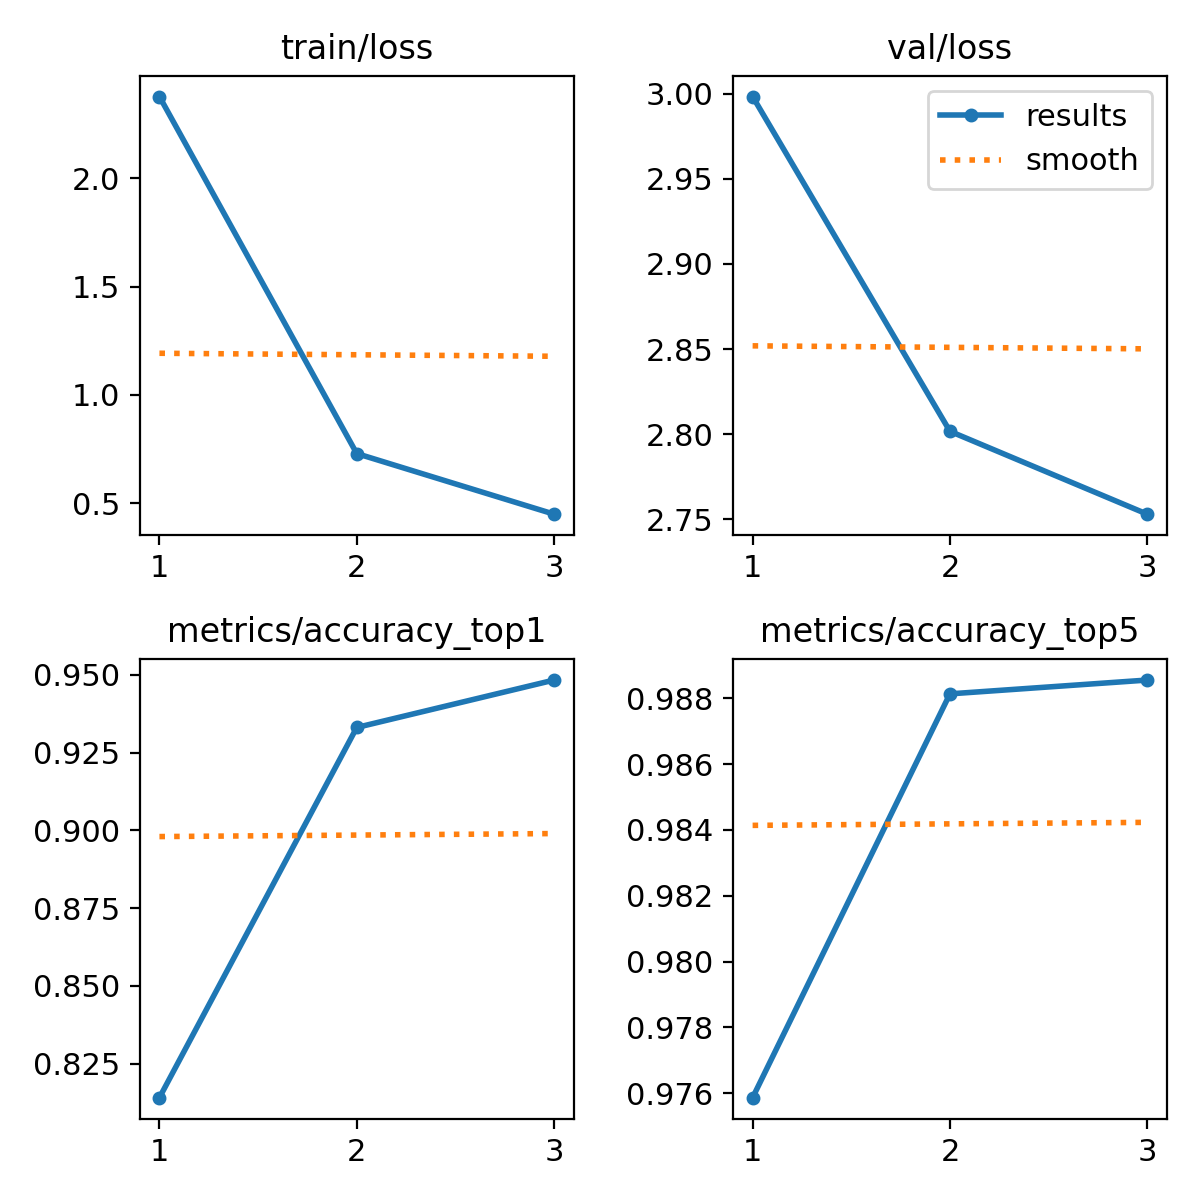

In [ ]:
Image.open("/content/runs/classify/train/results.png")

Showing confusion matrix, that is already stored in detect/train folder

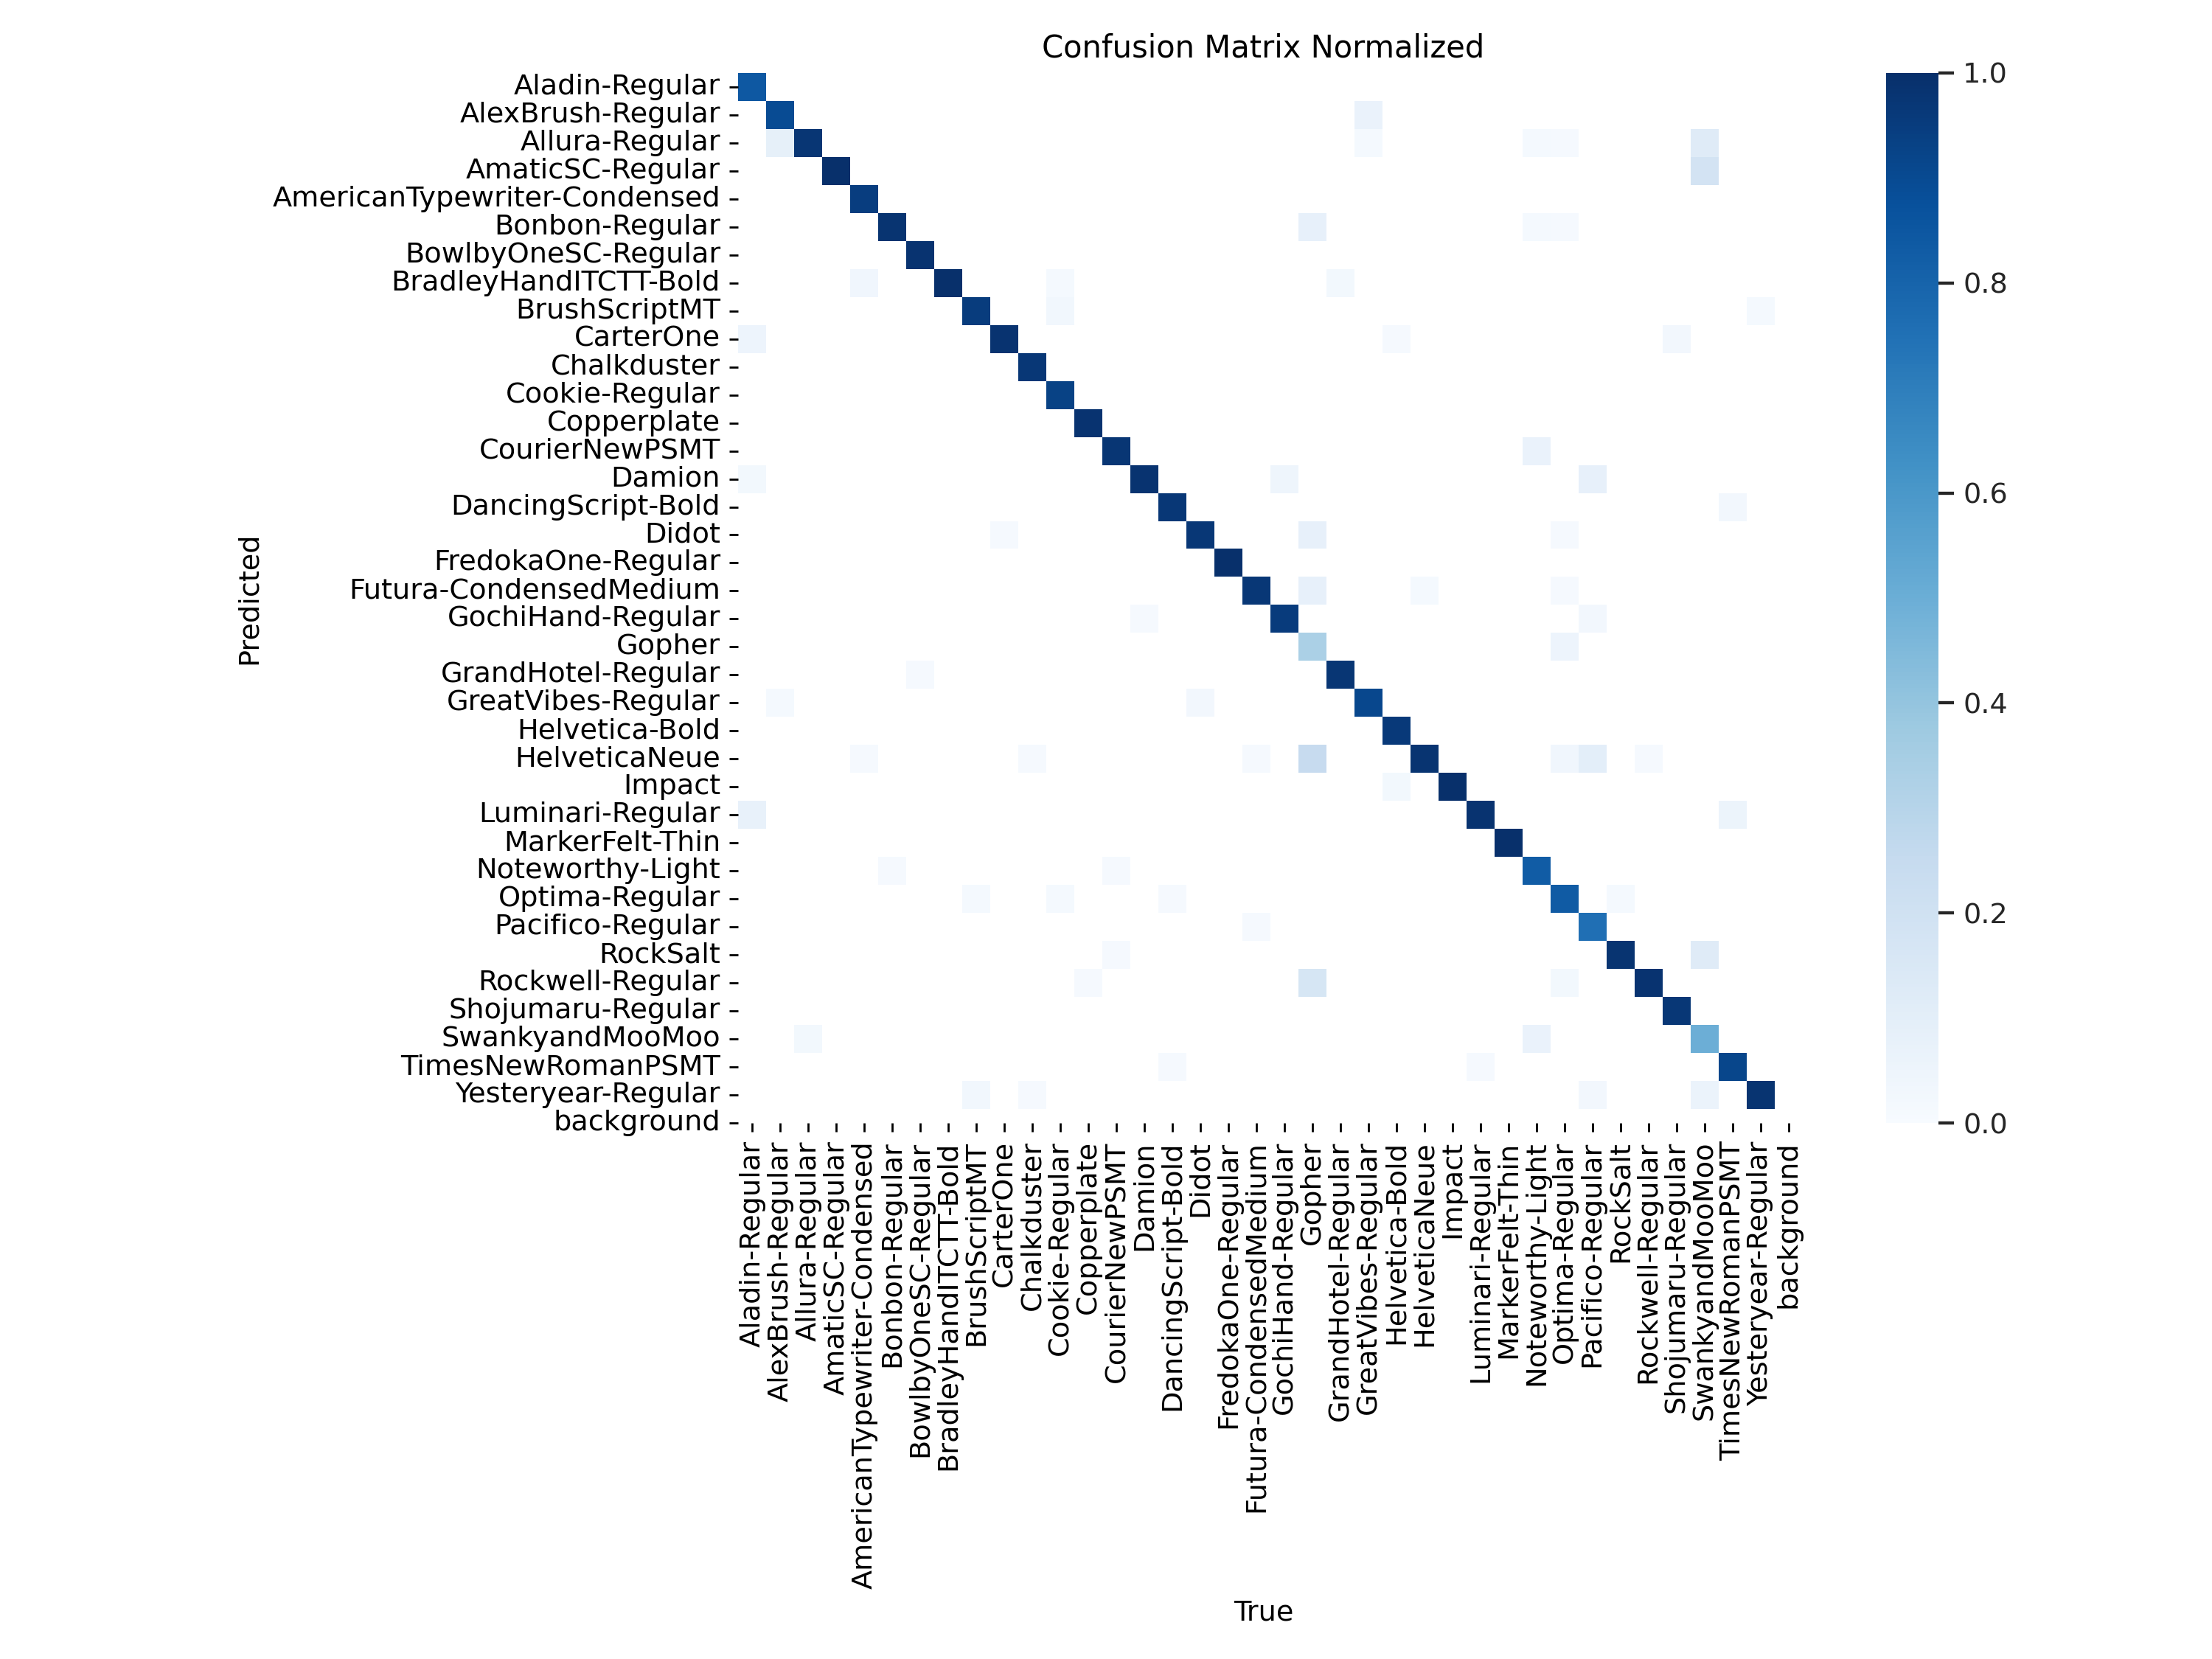

In [ ]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/classify/train/confusion_matrix_normalized.png')

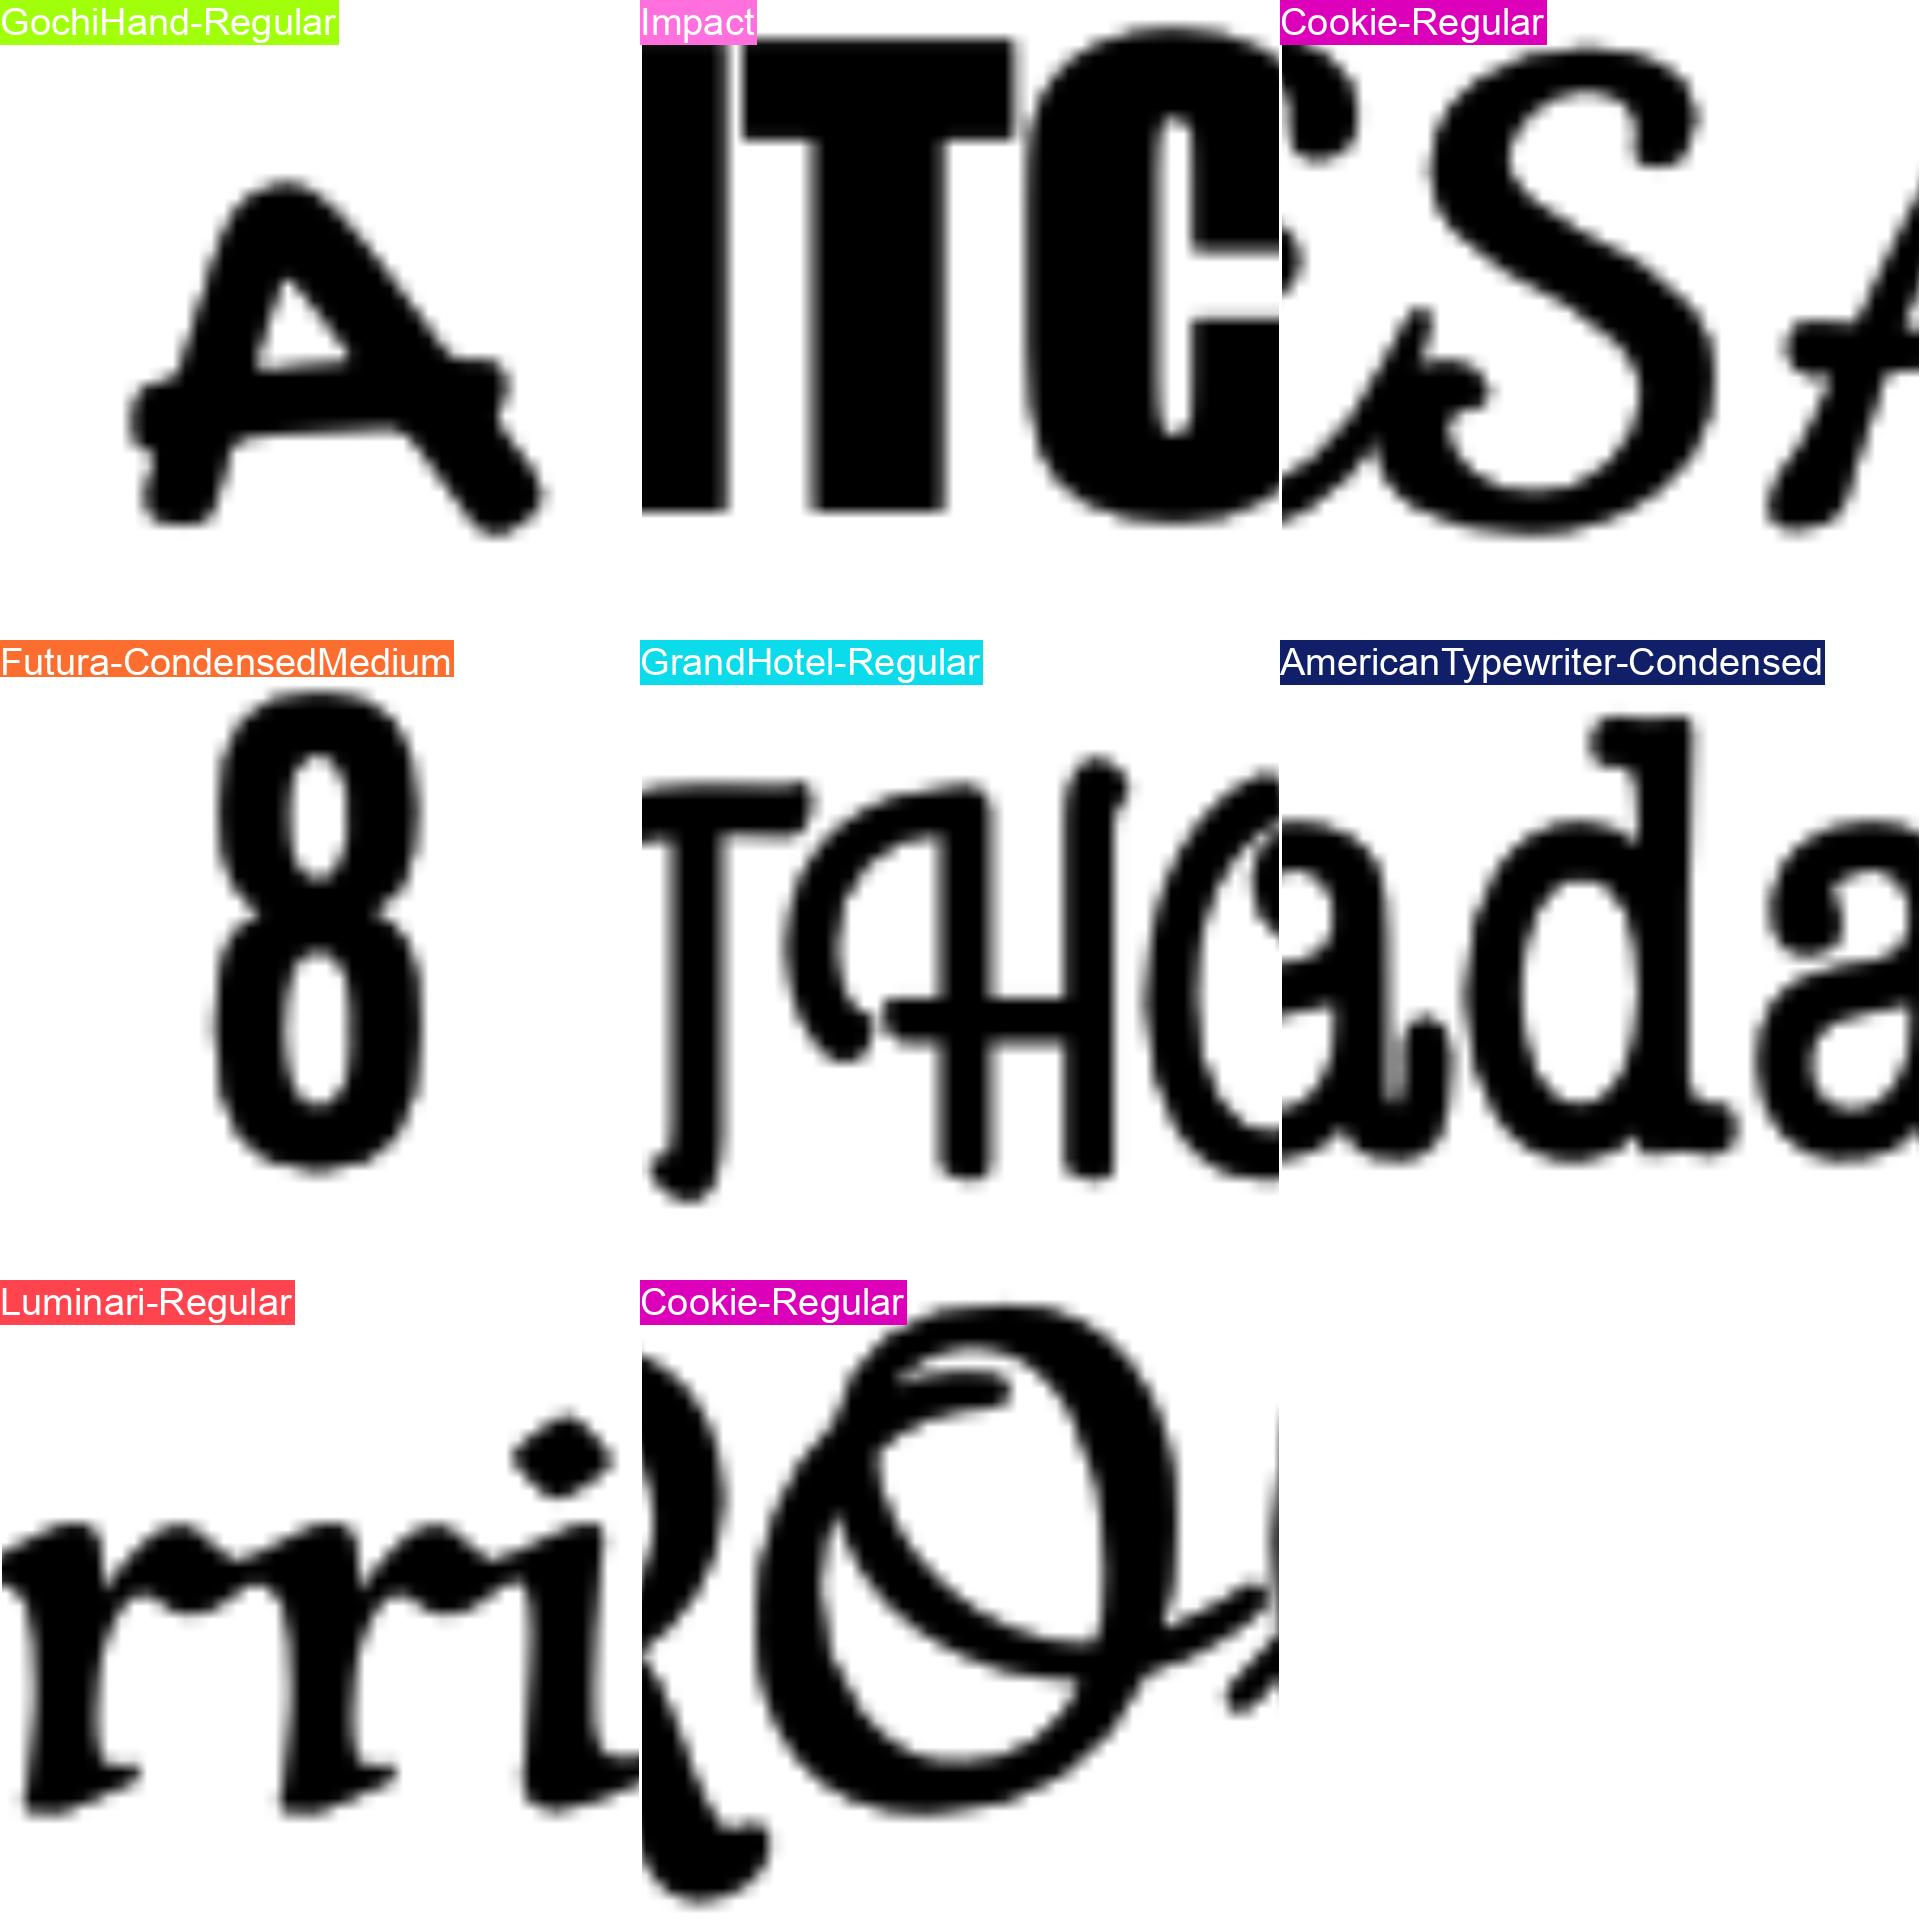

In [ ]:
Image.open('/content/runs/classify/train3/val_batch0_labels.jpg')

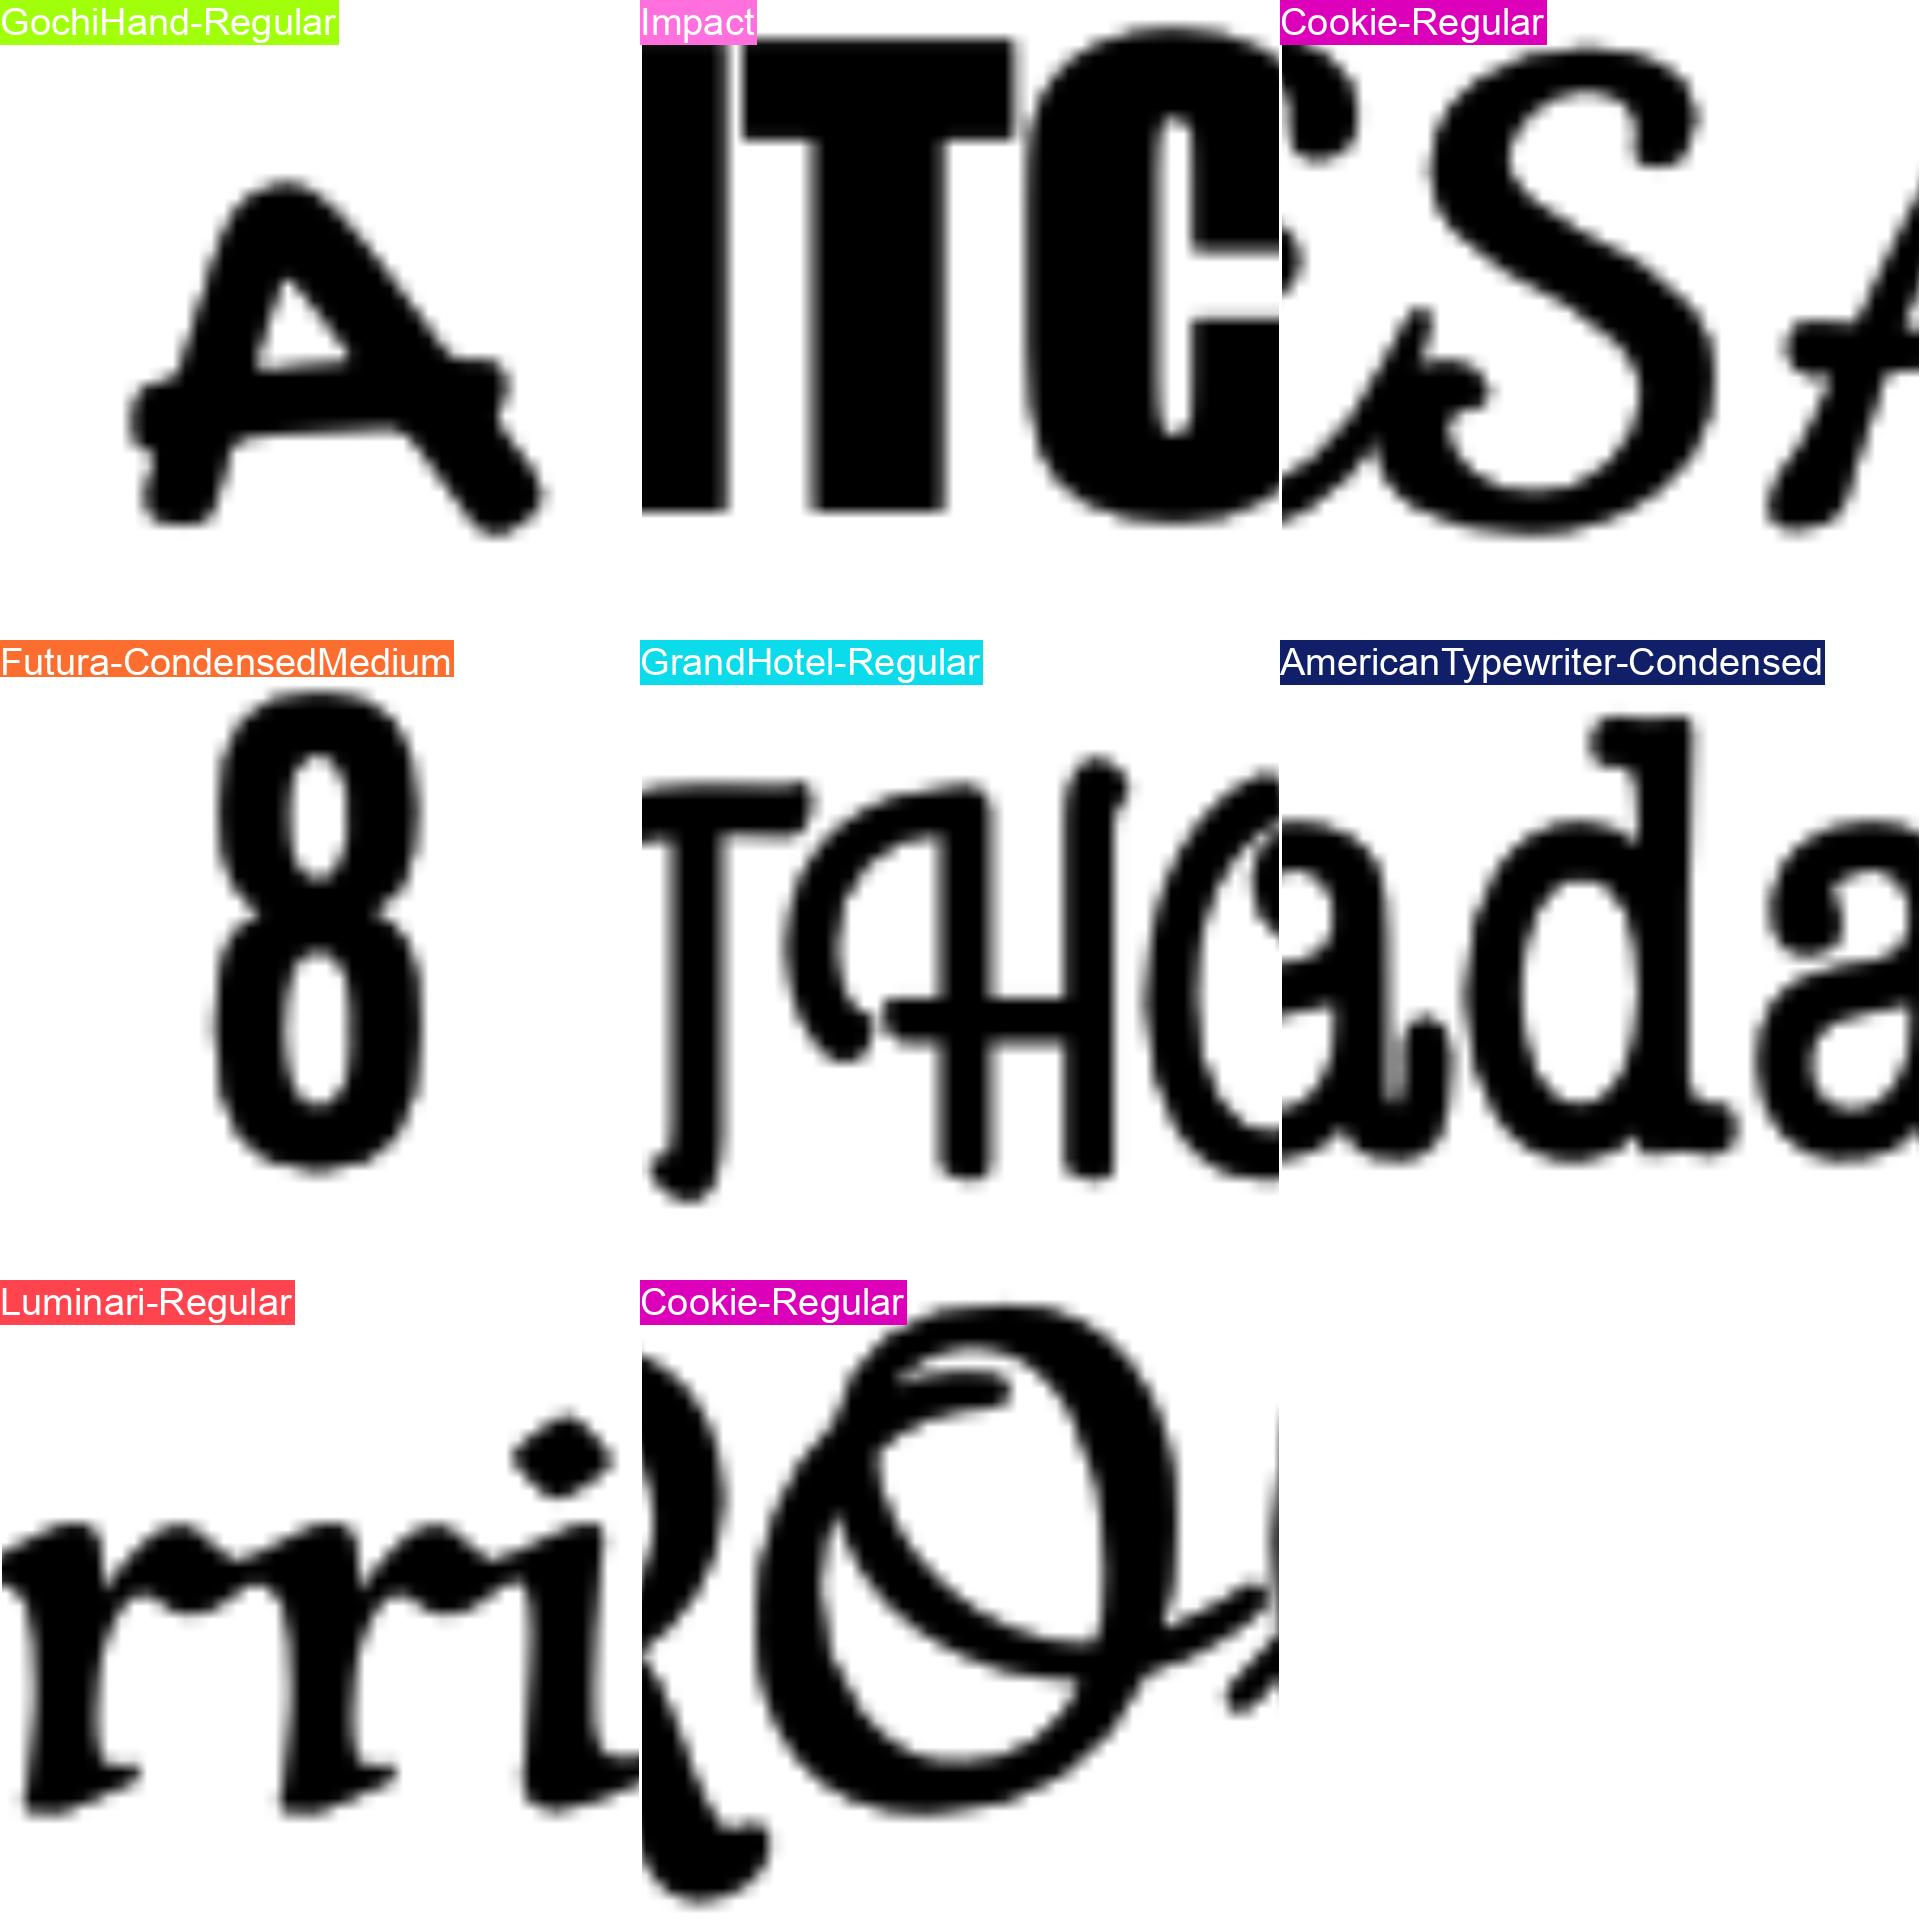

In [ ]:
Image.open('/content/runs/classify/train3/val_batch0_pred.jpg')

##Prediction

In [ ]:
model = YOLO('/content/runs/classify/train/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 640x640 Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05, 3.9ms
Speed: 18.6ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2


In [ ]:
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne_test_5.png', save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne_test_5.png: 640x640 Helvetica-Bold 0.15, CarterOne 0.15, Optima-Regular 0.11, Copperplate 0.09, Futura-CondensedMedium 0.07, 4.4ms
Speed: 14.7ms preprocess, 4.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2


In [ ]:
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne$$test_4.png')


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne$$test_4.png: 640x640 GochiHand-Regular 0.07, SwankyandMooMoo 0.06, RockSalt 0.05, BowlbyOneSC-Regular 0.04, Yesteryear-Regular 0.04, 4.5ms
Speed: 18.6ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_1.png')
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_2.png', save = True)
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/RockSalt/RockSalt_test_1.png', save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_1.png: 640x640 CourierNewPSMT 0.27, SwankyandMooMoo 0.07, Noteworthy-Light 0.05, TimesNewRomanPSMT 0.05, Optima-Regular 0.04, 3.9ms
Speed: 13.8ms preprocess, 3.9ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_2.png: 640x640 AmaticSC-Regular 0.30, SwankyandMooMoo 0.18, RockSalt 0.16, Noteworthy-Light 0.08, GrandHotel-Regular 0.05, 3.8ms
Speed: 13.3ms preprocess, 3.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/RockSalt/RockSalt_test_1.png: 640x640 BradleyHandITCTT-Bold 0.42, RockSalt 0.16, GrandHotel-Regular 0.08, DancingScript-Bold 0.07, Noteworthy-Light 0.04, 3.7ms
Speed: 13.6ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 64

In [ ]:
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test.png', save = True)
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo_test_3.png', save = True)
results = model('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo_test_5.png')


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test.png: 640x640 SwankyandMooMoo 0.05, GochiHand-Regular 0.05, RockSalt 0.04, Yesteryear-Regular 0.04, BradleyHandITCTT-Bold 0.04, 3.7ms
Speed: 18.5ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo_test_3.png: 640x640 SwankyandMooMoo 0.41, RockSalt 0.08, CourierNewPSMT 0.07, BowlbyOneSC-Regular 0.06, GrandHotel-Regular 0.05, 3.8ms
Speed: 13.9ms preprocess, 3.8ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/classify/predict2

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo_test_5.png: 640x640 CourierNewPSMT 0.25, SwankyandMooMoo 0.06, Noteworthy-Light 0.05, TimesNewRomanPSMT 0.05, GrandHotel-Regular 0.04, 3.8ms
Sp

Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05


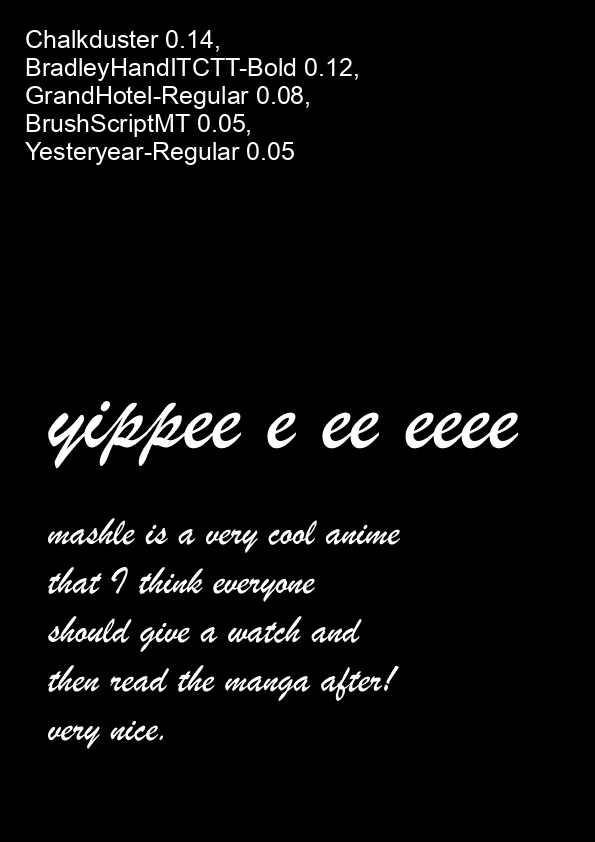

In [ ]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image
#the results
print('Chalkduster 0.14, BradleyHandITCTT-Bold 0.12, GrandHotel-Regular 0.08, BrushScriptMT 0.05, Yesteryear-Regular 0.05')
Image.open('/content/runs/classify/predict2/BrushscriptMT$$test_2.jpg')

Helvetica-Bold 0.15, CarterOne 0.15, Optima-Regular 0.11, Copperplate 0.09, Futura-CondensedMedium 0.07


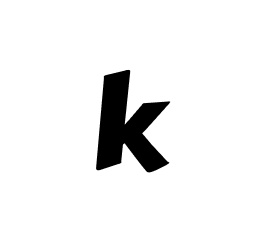

In [ ]:
#the results
print('Helvetica-Bold 0.15, CarterOne 0.15, Optima-Regular 0.11, Copperplate 0.09, Futura-CondensedMedium 0.07')
Image.open('/content/runs/classify/predict2/CarterOne_test_5.jpg')

AmaticSC-Regular 0.30, SwankyandMooMoo 0.18, RockSalt 0.16, Noteworthy-Light 0.08, GrandHotel-Regular 0.05


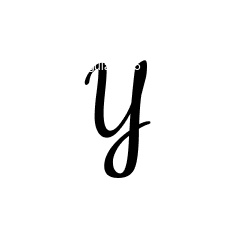

In [ ]:
#the results
print('AmaticSC-Regular 0.30, SwankyandMooMoo 0.18, RockSalt 0.16, Noteworthy-Light 0.08, GrandHotel-Regular 0.05')
Image.open('/content/runs/classify/predict2/Cookie_test_2.jpg')

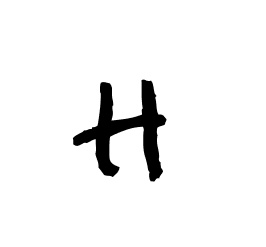

In [ ]:
#the results
print('BradleyHandITCTT-Bold 0.42, RockSalt 0.16, GrandHotel-Regular 0.08, DancingScript-Bold 0.07, Noteworthy-Light 0.04')
Image.open('/content/runs/classify/predict2/RockSalt_test_1.jpg')

SwankyandMooMoo 0.05, GochiHand-Regular 0.05, RockSalt 0.04, Yesteryear-Regular 0.04, BradleyHandITCTT-Bold 0.04


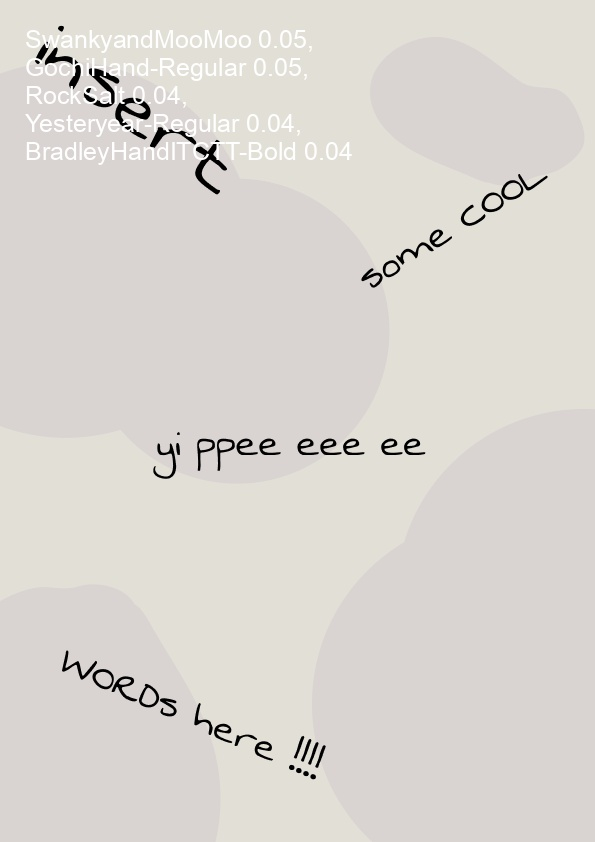

In [ ]:
#the results
print('SwankyandMooMoo 0.05, GochiHand-Regular 0.05, RockSalt 0.04, Yesteryear-Regular 0.04, BradleyHandITCTT-Bold 0.04')
Image.open('/content/runs/classify/predict2/SwankyandMooMoo$$test.jpg')

SwankyandMooMoo 0.41, RockSalt 0.08, CourierNewPSMT 0.07, BowlbyOneSC-Regular 0.06, GrandHotel-Regular 0.05


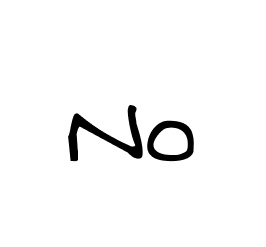

In [ ]:
#the results
print('SwankyandMooMoo 0.41, RockSalt 0.08, CourierNewPSMT 0.07, BowlbyOneSC-Regular 0.06, GrandHotel-Regular 0.05')
Image.open('/content/runs/classify/predict2/SwankyandMooMoo_test_3.jpg')

Information for second model: imagesize changed from 640 -> 224

In [ ]:
#metrics for model2
metrics = model2.val()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8s-cls summary (fused): 73 layers, 5,122,597 parameters, 0 gradients, 12.5 GFLOPs
train: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/train... found 9441 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
val: /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... found 2361 images in 38 classes: ERROR ❌️ requires 37 classes, not 38
test: None...


val: Scanning /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val... 2361 images, 0 corrupt: 100%|██████████| 2361/2361 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 296/296 [00:07<00:00, 40.27it/s]


                   all      0.952      0.992
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train62


In [25]:
y_pred = []

for img in X_test:
  results = model2(img)[0]
  predicted_class = results.probs.top1 #get the lable with the highest weight/score
  predicted_class_name = results.names[predicted_class]

  y_pred.append(predicted_class_name)

Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U006fU0072U0074.00000.png: 224x224 Didot 1.00, Luminari-Regular 0.00, Optima-Regular 0.00, TimesNewRomanPSMT 0.00, Allura-Regular 0.00, 4.5ms
Speed: 3.7ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U0053U0049U0052.00000.png: 224x224 Didot 1.00, TimesNewRomanPSMT 0.00, Allura-Regular 0.00, Luminari-Regular 0.00, AmaticSC-Regular 0.00, 6.4ms
Speed: 5.1ms preprocess, 6.4ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/drive/MyDrive/IAT 360/ComputerVision/Final_data/images/val/Didot/Didot$$U0048U0052U0045.00000.png: 224x224 Didot 1.00, Luminari-Regular 0.00, TimesNewRomanPSMT 0.00, AmaticSC-Regular 0.00, GreatVibes-Regular 0.00, 3.7ms
Speed: 3.6ms preprocess, 3.7ms inference, 0.0ms

In [26]:
y_pred

['Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'Aladin-Regular',
 'CarterOne',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Aladin-Regular',
 'Damion',
 'CarterOne',
 'Aladin-Regular',
 'Aladin-Regular',
 'Luminari-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'GrandHotel-Regular',
 'BowlbyOneSC-Regular',
 'BowlbyOneSC-Regular',
 'Bowlby

In [27]:
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%')
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  95.660%
Test Set Precision score =  94.303%
Test Set Recall score =  93.386%
Test Set F-score score =  93.4%


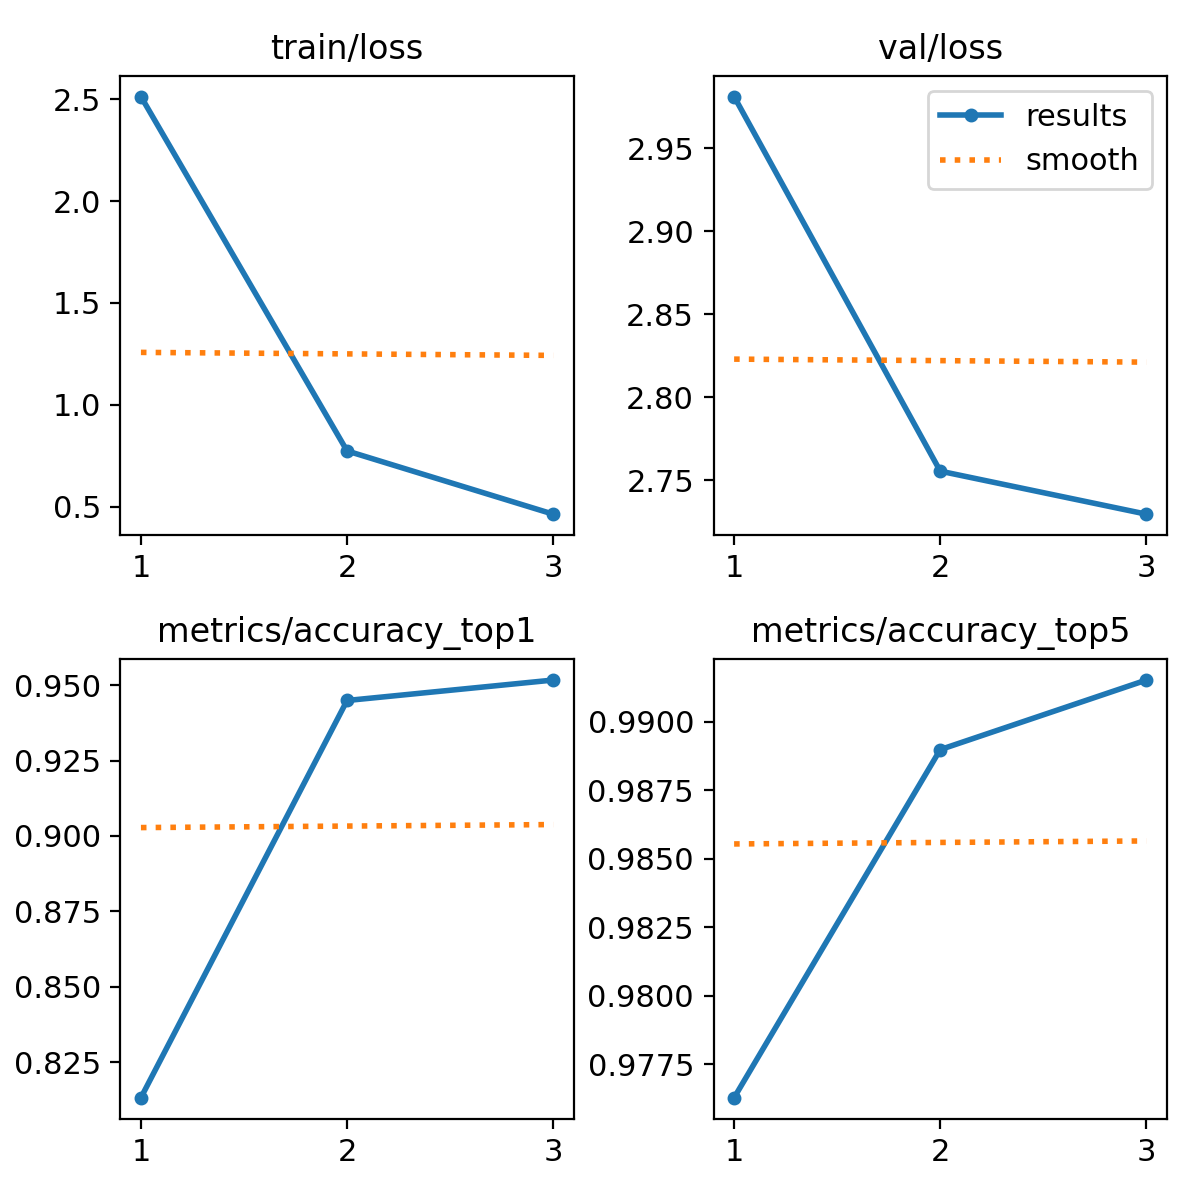

In [ ]:
Image.open('/content/runs/classify/train6/results.png')

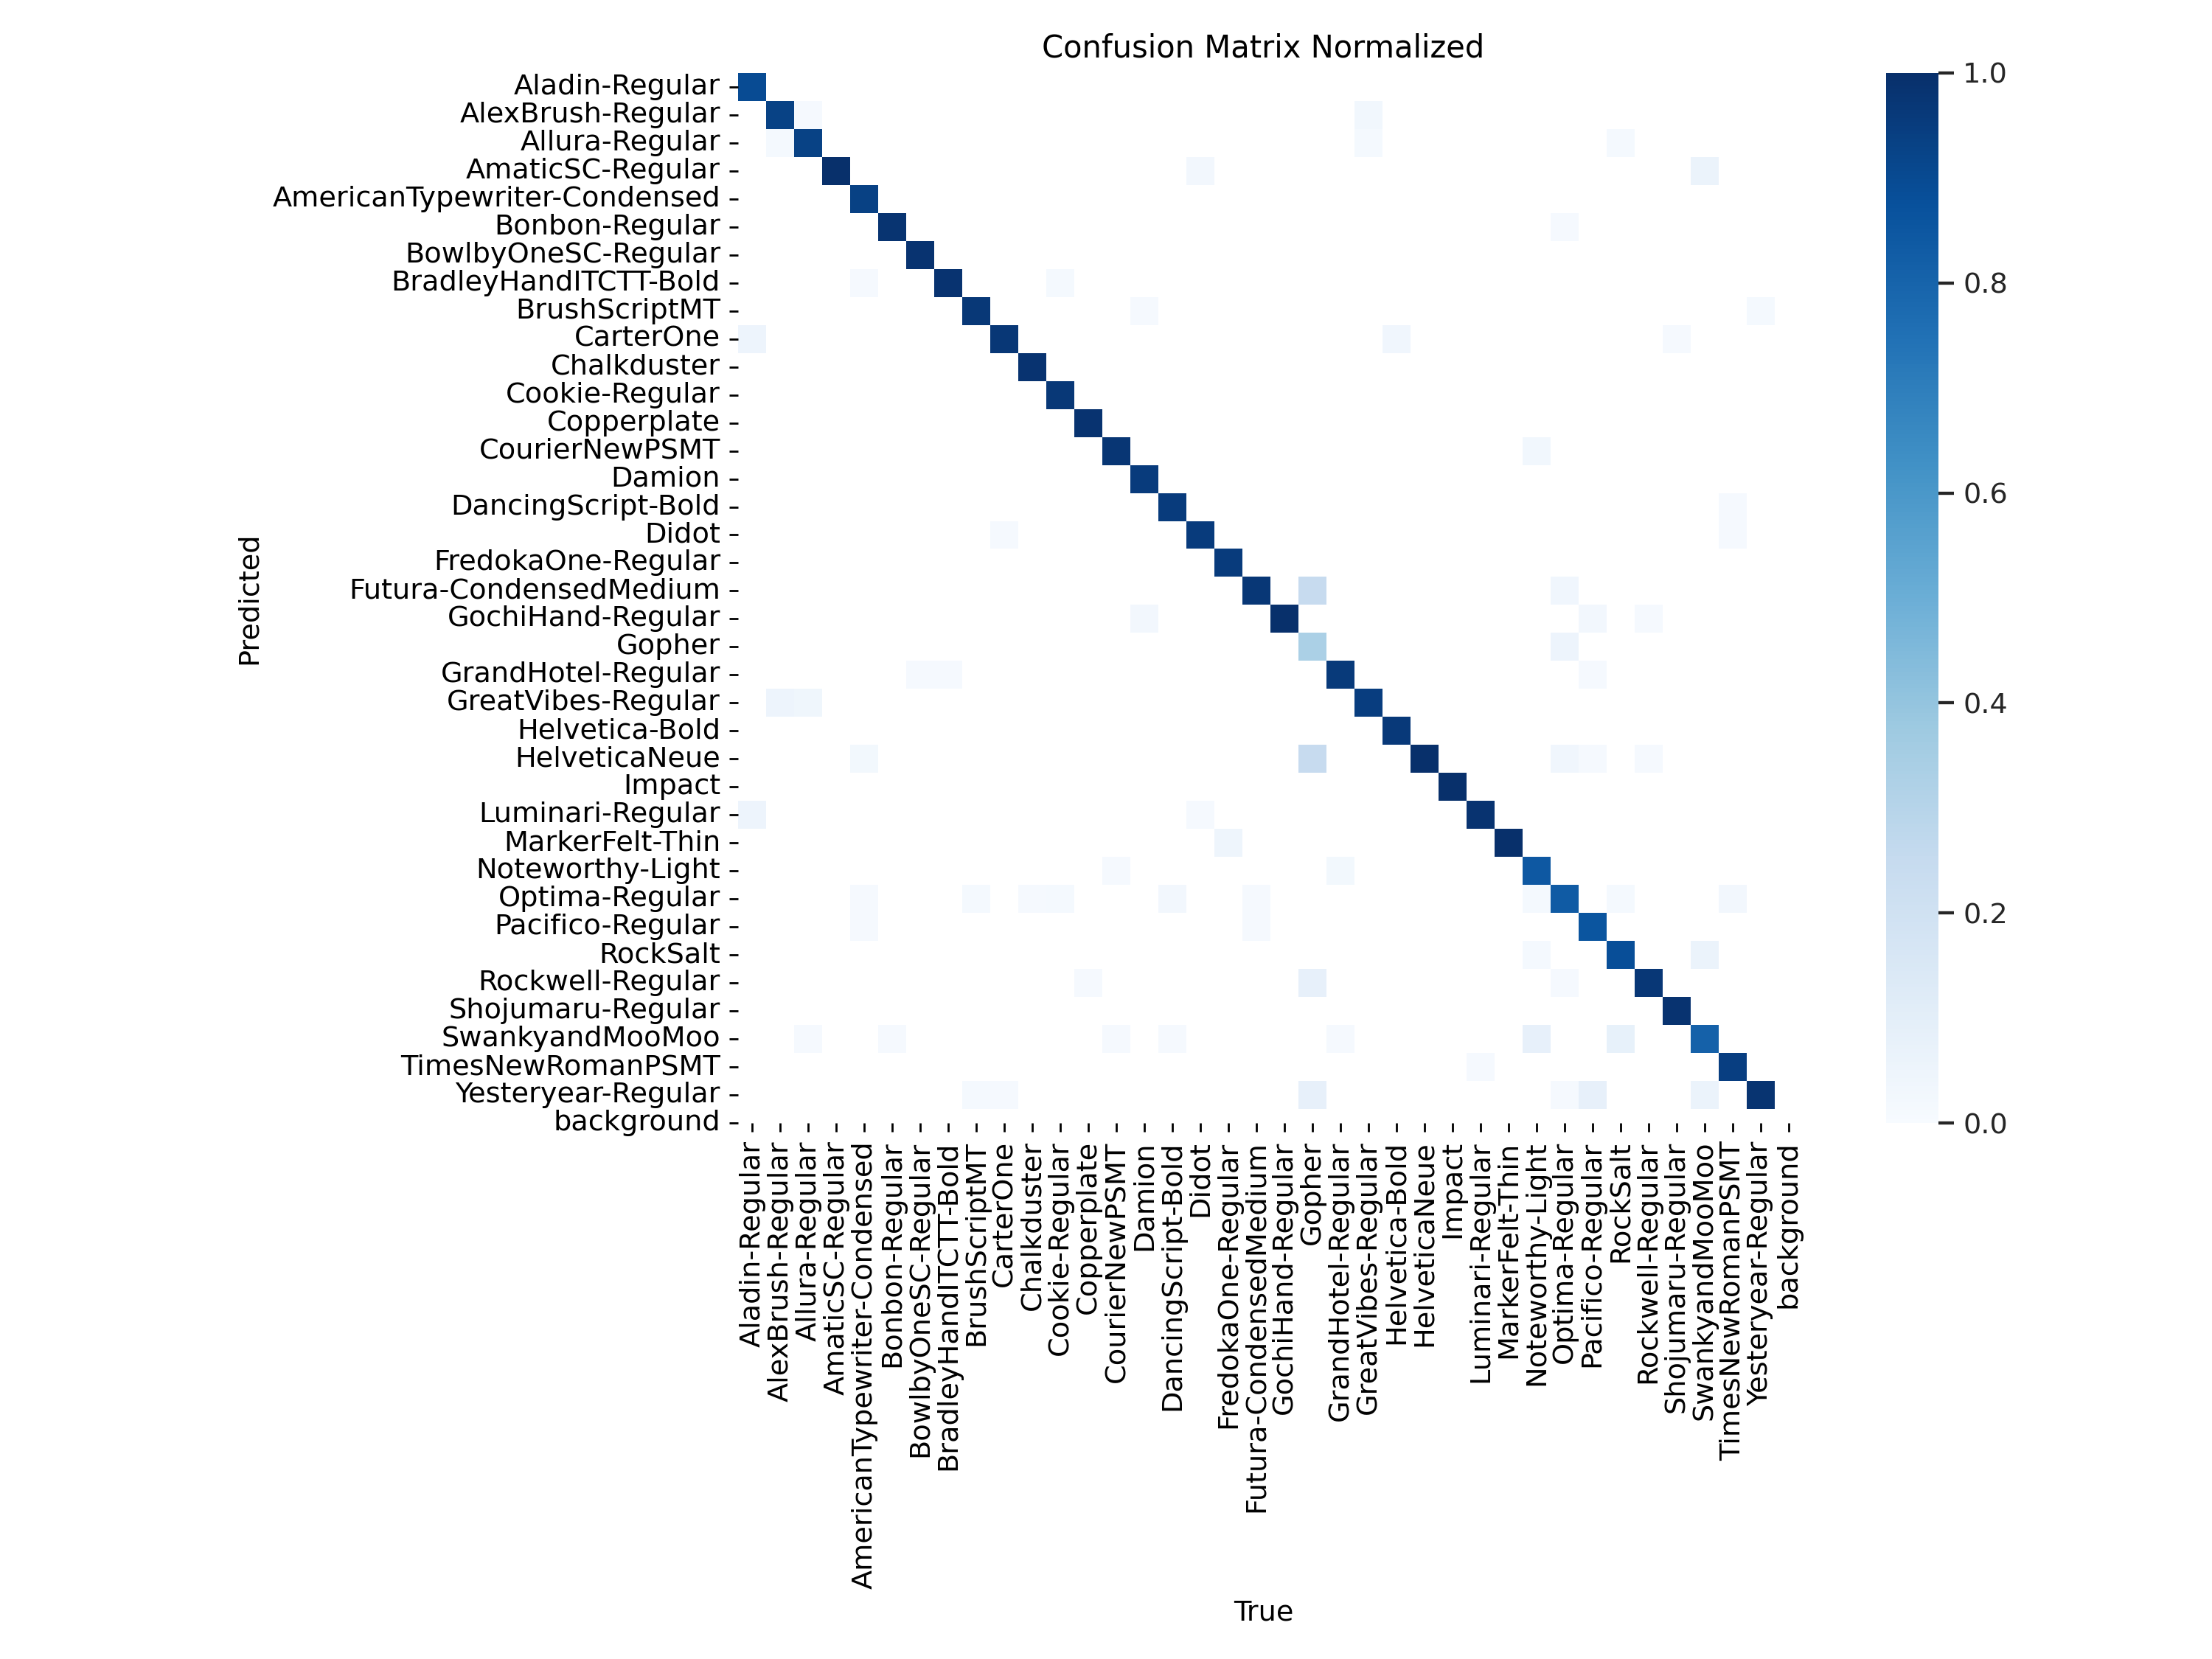

In [ ]:
Image.open('/content/runs/classify/train62/confusion_matrix_normalized.png')

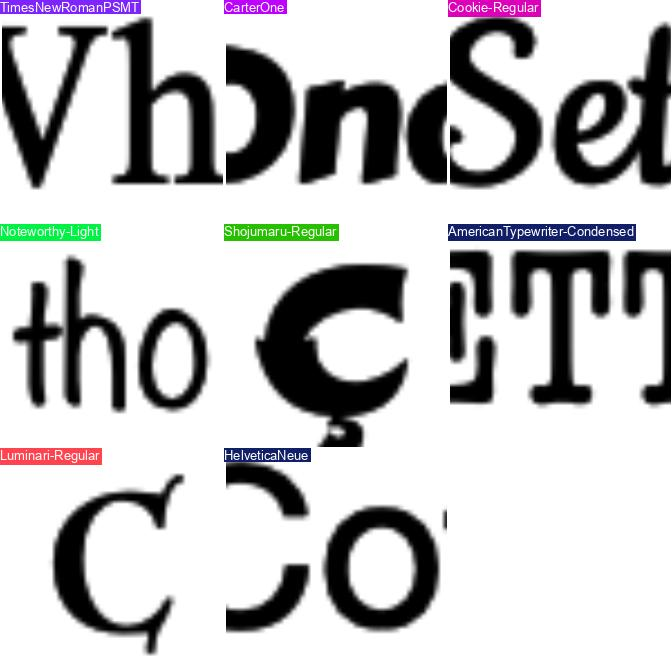

In [ ]:
Image.open('/content/runs/classify/train62/val_batch2_labels.jpg')

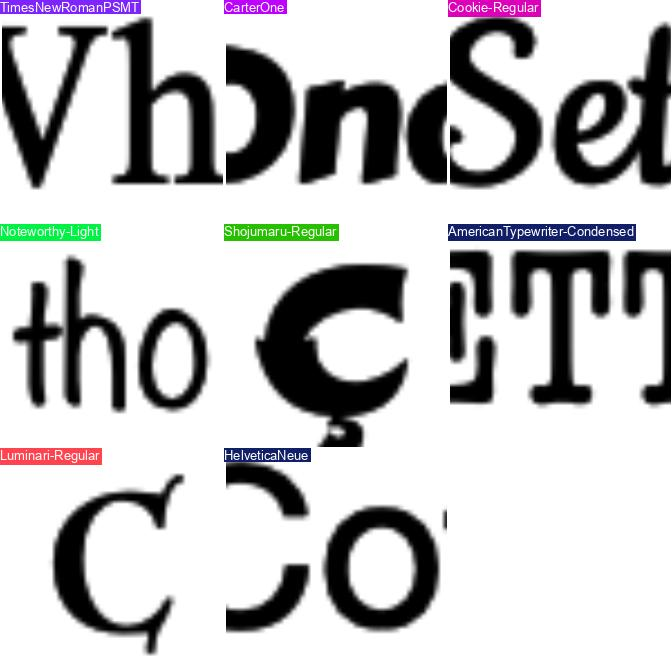

In [ ]:
Image.open('/content/runs/classify/train62/val_batch2_pred.jpg')

In [ ]:
model2 = YOLO('/content/runs/classify/train6/weights/best.pt')  # load a custom model

In [ ]:
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png', save=True)
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne_test_5.png', save = True)
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_2.png', save = True)
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/RockSalt/RockSalt_test_1.png', save = True)
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo$$test.png', save = True)
results = model2('/content/drive/MyDrive/IAT 360/Computer Vision Project/test/SwankyandMooMoo/SwankyandMooMoo_test_3.png', save = True)


image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/BrushScriptMT/BrushscriptMT$$test_2.png: 224x224 Chalkduster 0.05, GreatVibes-Regular 0.05, AmaticSC-Regular 0.05, Allura-Regular 0.05, BrushScriptMT 0.04, 3.7ms
Speed: 6.9ms preprocess, 3.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict3

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/CarterOne/CarterOne_test_5.png: 224x224 Yesteryear-Regular 0.93, Luminari-Regular 0.03, CarterOne 0.01, Didot 0.01, TimesNewRomanPSMT 0.01, 3.8ms
Speed: 3.4ms preprocess, 3.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict3

image 1/1 /content/drive/MyDrive/IAT 360/Computer Vision Project/test/Cookie/Cookie_test_2.png: 224x224 AmaticSC-Regular 0.83, GreatVibes-Regular 0.15, Didot 0.01, Allura-Regular 0.00, SwankyandMooMoo 0.00, 3.7ms
Speed: 3.3ms preprocess, 3.7ms inference, 0.0ms postprocess per 

In [ ]:
#the results
print('Chalkduster 0.05, GreatVibes-Regular 0.05, AmaticSC-Regular 0.05, Allura-Regular 0.05, BrushScriptMT 0.04')
Image.open('/content/runs/classify/predict3/BrushscriptMT$$test_2.jpg')

Chalkduster 0.05, GreatVibes-Regular 0.05, AmaticSC-Regular 0.05, Allura-Regular 0.05, BrushScriptMT 0.04


Yesteryear-Regular 0.93, Luminari-Regular 0.03, CarterOne 0.01, Didot 0.01, TimesNewRomanPSMT 0.01


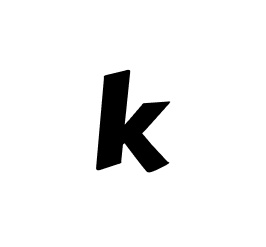

In [ ]:
#the results
print('Yesteryear-Regular 0.93, Luminari-Regular 0.03, CarterOne 0.01, Didot 0.01, TimesNewRomanPSMT 0.01')
Image.open('/content/runs/classify/predict3/CarterOne_test_5.jpg')

AmaticSC-Regular 0.83, GreatVibes-Regular 0.15, Didot 0.01, Allura-Regular 0.00, SwankyandMooMoo 0.00


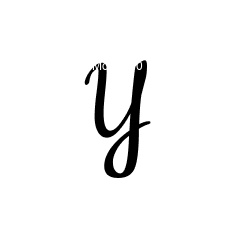

In [ ]:
#the results
print('AmaticSC-Regular 0.83, GreatVibes-Regular 0.15, Didot 0.01, Allura-Regular 0.00, SwankyandMooMoo 0.00')
Image.open('/content/runs/classify/predict3/Cookie_test_2.jpg')

RockSalt 0.85, BradleyHandITCTT-Bold 0.07, SwankyandMooMoo 0.05, Allura-Regular 0.01, Noteworthy-Light 0.01


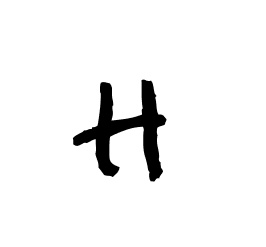

In [ ]:
#the results
print('RockSalt 0.85, BradleyHandITCTT-Bold 0.07, SwankyandMooMoo 0.05, Allura-Regular 0.01, Noteworthy-Light 0.01')
Image.open('/content/runs/classify/predict3/RockSalt_test_1.jpg')

GreatVibes-Regular 0.07, Allura-Regular 0.06, AlexBrush-Regular 0.05, AmaticSC-Regular 0.05, Bonbon-Regular 0.04


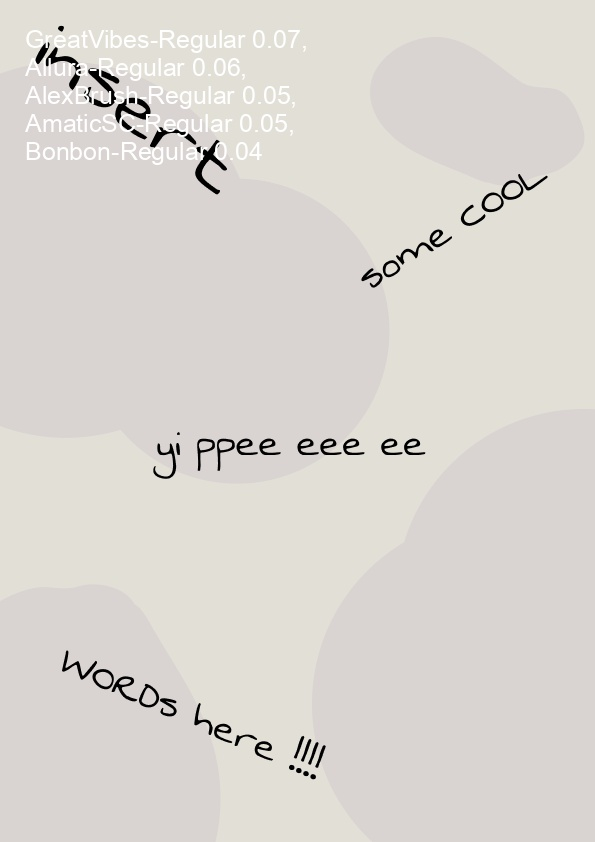

In [ ]:
#the results
print('GreatVibes-Regular 0.07, Allura-Regular 0.06, AlexBrush-Regular 0.05, AmaticSC-Regular 0.05, Bonbon-Regular 0.04')
Image.open('/content/runs/classify/predict3/SwankyandMooMoo$$test.jpg')

Didot 0.51, SwankyandMooMoo 0.35, AmaticSC-Regular 0.08, GreatVibes-Regular 0.02, AlexBrush-Regular 0.02


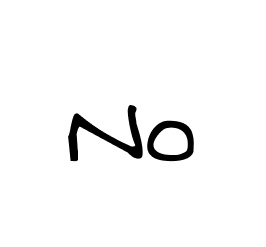

In [ ]:
#the results
print('Didot 0.51, SwankyandMooMoo 0.35, AmaticSC-Regular 0.08, GreatVibes-Regular 0.02, AlexBrush-Regular 0.02')
Image.open('/content/runs/classify/predict3/SwankyandMooMoo_test_3.jpg')